In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.style.use("seaborn-v0_8-whitegrid")

# 한글 폰트 경로 설정 (예시: NGULIM)
font_path = r"C:\Windows\Fonts\NGULIM.TTF"
font_prop = fm.FontProperties(fname=font_path)

# 폰트 설정
plt.rc('font', family=font_prop.get_name())

In [4]:
## 클래스로 만들어보기
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(MLP, self).__init__()
        # 첫번째 완전 연결층
        self.fc1 = nn.Linear(input_size, hidden_size1)
        # 첫번째 ReLU 활성화 함수
        self.relu1 = nn.ReLU()
        # 두번째 완전 연결층
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        # 두번째 ReLU 활성화 함수
        self.relu2 = nn.ReLU()
        # 마지막 출력층
        self.fc3 = nn.Linear(hidden_size2, output_size)
    def forward(self, x):
        # 순전파 과정
        output = self.fc1(x)
        output = self.relu1(output)
        output = self.fc2(output)
        output = self.relu2(output)
        output = self.fc3(output)
        return output

In [5]:
# 데이터 가져오기
california = fetch_california_housing()

X, Y = california.data, california.target

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=11)

In [6]:
# 스케일러 적용
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1,1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1,1)

In [8]:
# 하이퍼파라미터 설정
input_size = X_train.shape[1]
hidden_size1 = 64 # 첫번째 은닉층의 크기(노드의 개수)
hidden_size2 = 32 # 두번째 은닉층의 크기(노드의 개수)
output_size = y_train.shape[1] # 출력층
learning_rate = 0.01
epochs = 1000 # 반복 학습 횟수

In [9]:
# 모델 초기화 
model = MLP(input_size, hidden_size1, hidden_size2, output_size)

# 손실함수와 옵티마이저를 정의
criterion = nn.MSELoss() # 평균 제곱 오차
optimizer = optim.SGD(model.parameters(), lr=learning_rate) # SGD 옵티마이저 사용

# 경사하강법을 통해서 학습
for i in range(epochs):
    
    # 순전파 실행
    output = model(X_train)

    # 손실함수 계산
    loss = criterion(output, y_train)

    # 가중치 업데이트 
    optimizer.zero_grad() # 옵티마이저의 모든 기울기를 0으로 초기화
    loss.backward() # 역전파를 통해서 기울기 계산
    optimizer.step() # 옵티마이저가 가중치를 업데이트 하게됨

    # 100번마다 손실값을 출력해보기
    if i%100 ==0:
        print(f"{i}번째 손실값은 :", loss.item())

0번째 손실값은 : 5.952062606811523
100번째 손실값은 : 0.6338154673576355
200번째 손실값은 : 0.5740593671798706
300번째 손실값은 : 0.5387570858001709
400번째 손실값은 : 0.5120202898979187
500번째 손실값은 : 0.49197742342948914
600번째 손실값은 : 0.47657471895217896
700번째 손실값은 : 0.4646463990211487
800번째 손실값은 : 0.45501869916915894
900번째 손실값은 : 0.44686034321784973


epochs 0, Training Cost: 6.087125301361084, Test Cost: 5.87611198425293
epochs 100, Training Cost: 0.6446216702461243, Test Cost: 0.6594591736793518
epochs 200, Training Cost: 0.5769320130348206, Test Cost: 0.5915213227272034
epochs 300, Training Cost: 0.533494770526886, Test Cost: 0.5472803115844727
epochs 400, Training Cost: 0.5043649077415466, Test Cost: 0.5177891254425049
epochs 500, Training Cost: 0.4847204089164734, Test Cost: 0.49819254875183105
epochs 600, Training Cost: 0.47068336606025696, Test Cost: 0.4846898019313812
epochs 700, Training Cost: 0.45999008417129517, Test Cost: 0.4744319021701813
epochs 800, Training Cost: 0.45119020342826843, Test Cost: 0.4661276042461395
epochs 900, Training Cost: 0.44345924258232117, Test Cost: 0.4588705897331238
Final Training Cost: 0.4365142583847046
Final Test Cost: 0.45243382453918457


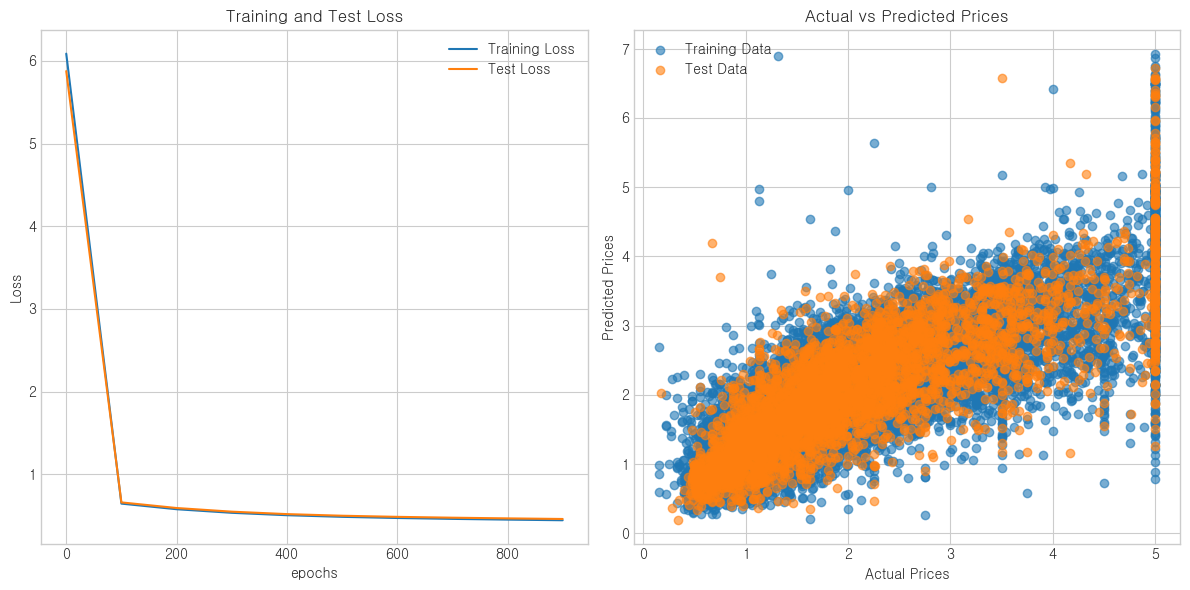

In [10]:
# 시각화 해보기
# 모델 초기화 
model = MLP(input_size, hidden_size1, hidden_size2, output_size)

# 손실함수와 옵티마이저를 정의
criterion = nn.MSELoss() # 평균 제곱 오차
optimizer = optim.SGD(model.parameters(), lr=learning_rate) # SGD 옵티마이저 사용

# 경사하강법을 이용한 학습 과정
train_losses = []
test_losses = []
for i in range(epochs):
    # 순전파: 입력 데이터를 모델에 통과시켜 출력값 계산
    outputs = model(X_train)
    # 손실 계산: 예측값과 실제값의 차이를 MSE 손실 함수로 계산
    loss = criterion(outputs, y_train)
    
    # 역전파 및 가중치 업데이트
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 100번 반복할 때마다 손실 출력
    if i % 100 == 0:
        with torch.no_grad():
            test_outputs = model(X_test)
            test_loss = criterion(test_outputs, y_test)
        train_losses.append(loss.item())
        test_losses.append(test_loss.item())
        print(f"epochs {i}, Training Cost: {loss.item()}, Test Cost: {test_loss.item()}")

# 최종 비용 출력
final_train_loss = criterion(model(X_train), y_train)
final_test_loss = criterion(model(X_test), y_test)
print(f"Final Training Cost: {final_train_loss.item()}")
print(f"Final Test Cost: {final_test_loss.item()}")

# 학습 결과 시각화
plt.figure(figsize=(12, 6))

# 학습 손실과 테스트 손실 그래프
plt.subplot(1, 2, 1)
plt.plot(range(0, epochs, 100), train_losses, label='Training Loss')
plt.plot(range(0, epochs, 100), test_losses, label='Test Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Test Loss')

# 예측 결과 시각화
plt.subplot(1, 2, 2)
with torch.no_grad():
    train_pred = model(X_train).cpu().numpy()
    test_pred = model(X_test).cpu().numpy()

plt.scatter(y_train.cpu().numpy(), train_pred, label='Training Data', alpha=0.6)
plt.scatter(y_test.cpu().numpy(), test_pred, label='Test Data', alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.title('Actual vs Predicted Prices')

plt.tight_layout()
plt.show()